# Expenditure Explorations

This notebook looks for households that report backup spending on private gensets while also reporting another type of access like grid or microgrid.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import drs_sentani as sti
survey = sti.get_survey()

We are testing for the presence of multiple types of electricity expenditures by adding up boolean masks for non-null expenditures.  Only eight households report having a genset expenditure as well as an organized electricity source.

In [15]:
multiple_expenditure_households = (pd.notnull(survey['community_microgrid_expenditure']).astype(int) +  
                                   pd.notnull(survey['genset_expenditure']).astype(int) + 
                                   pd.notnull(survey['PLN_expenditure']).astype(int))
(multiple_expenditure_households >= 2).sum()

8

/Users/dsoto/anaconda/envs/sotolab/lib/python3.4/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


(0, 1000000.0)

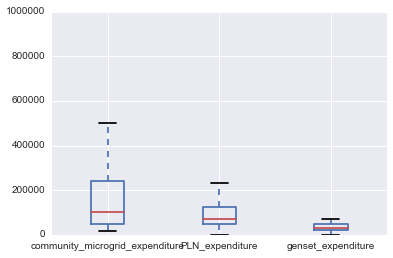

In [17]:
survey[['community_microgrid_expenditure', 'PLN_expenditure', 'genset_expenditure']].boxplot()
plt.ylim((0, 1e6))